In [2]:
%load_ext autoreload
%autoreload 2
from vpower.interp import SimulationParticles
import matplotlib.pyplot as plt
plt.style.use('yjhe.mplstyle')

SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
allPar = SimulationParticles.load_snapshot(SNAPSHOT)

In [10]:
import numpy as np
"Our pixel is {} times bigger than the smallest particles"\
.format(1/16384/np.min(allPar.h()))

'Our pixel is 50.83025120016474 times bigger than the smallest particles'

In [36]:
smallPar = allPar[allPar.h() < 1/16384]
print("The number of particles with r < 1/16384 is {}, in fraction {:.2%}"\
.format(len(smallPar), len(smallPar)/len(allPar)))
print("Have an average mass of {} and an average density of {}"\
.format(smallPar.mass.mean(), smallPar.density.mean()))
print("Compare to the average mass of {} and the average density of {}"\
.format(allPar.mass.mean(), allPar.density.mean()))

The number of particles with r < 1/16384 is 52713, in fraction 0.55%
Have an average mass of 4.465161724875131e-11 and an average density of 1209.079290204402
Compare to the average mass of 1.3096474963097345e-10 and the average density of 6.932348904835645


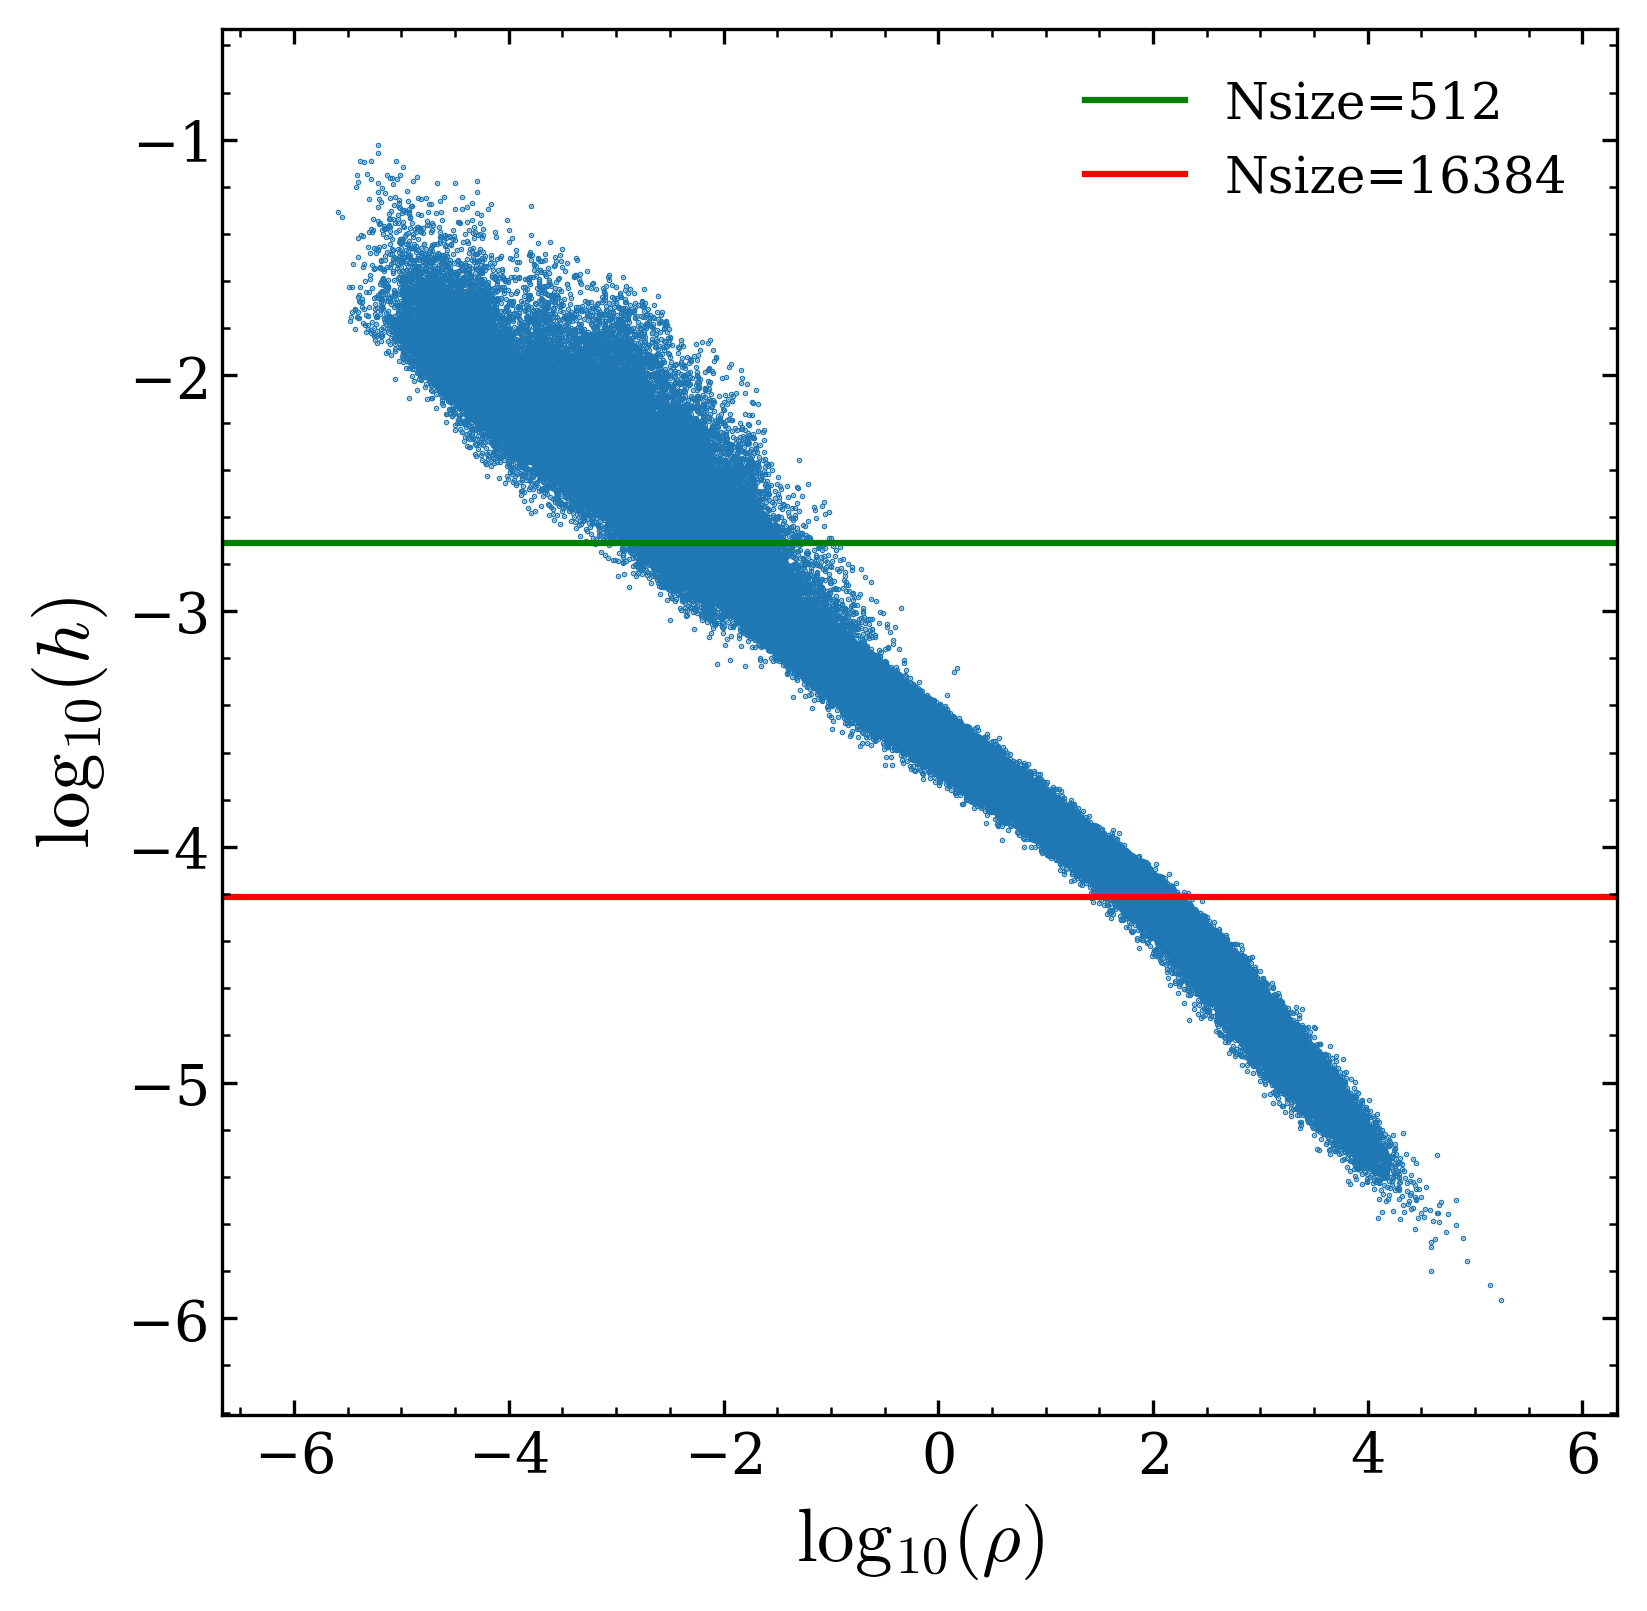

In [10]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(np.log10(allPar.density), np.log10(allPar.h()), s=0.1)
ax.axhline(np.log10(1/512), label="Nsize=512", c="g")
ax.axhline(np.log10(1/16384), label="Nsize=16384", c="r")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(h)$")
plt.legend()
plt.show()

## Try using voxelize for high density regions


In [5]:
import vpower.voxelize
smallPar = allPar[allPar.h() < 1/512]
histField = smallPar.voxelize_interp_to_field(Nsize=256)

Interpolating velocity field...
Padding:  0.0009682633118290873 Lbox:  1.0019365266236582 Nsize:  256
Auto padding done. Time elapsed: 0.74 s


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 21075811 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	1.980e+07 exact calculations (R>Rmax),
	1.273e+06 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 21075811 numbers in 663 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 1.7610 seconds
In the end, 0 in cpu_queue


Interpolation done. Time elapsed: 3.11 s


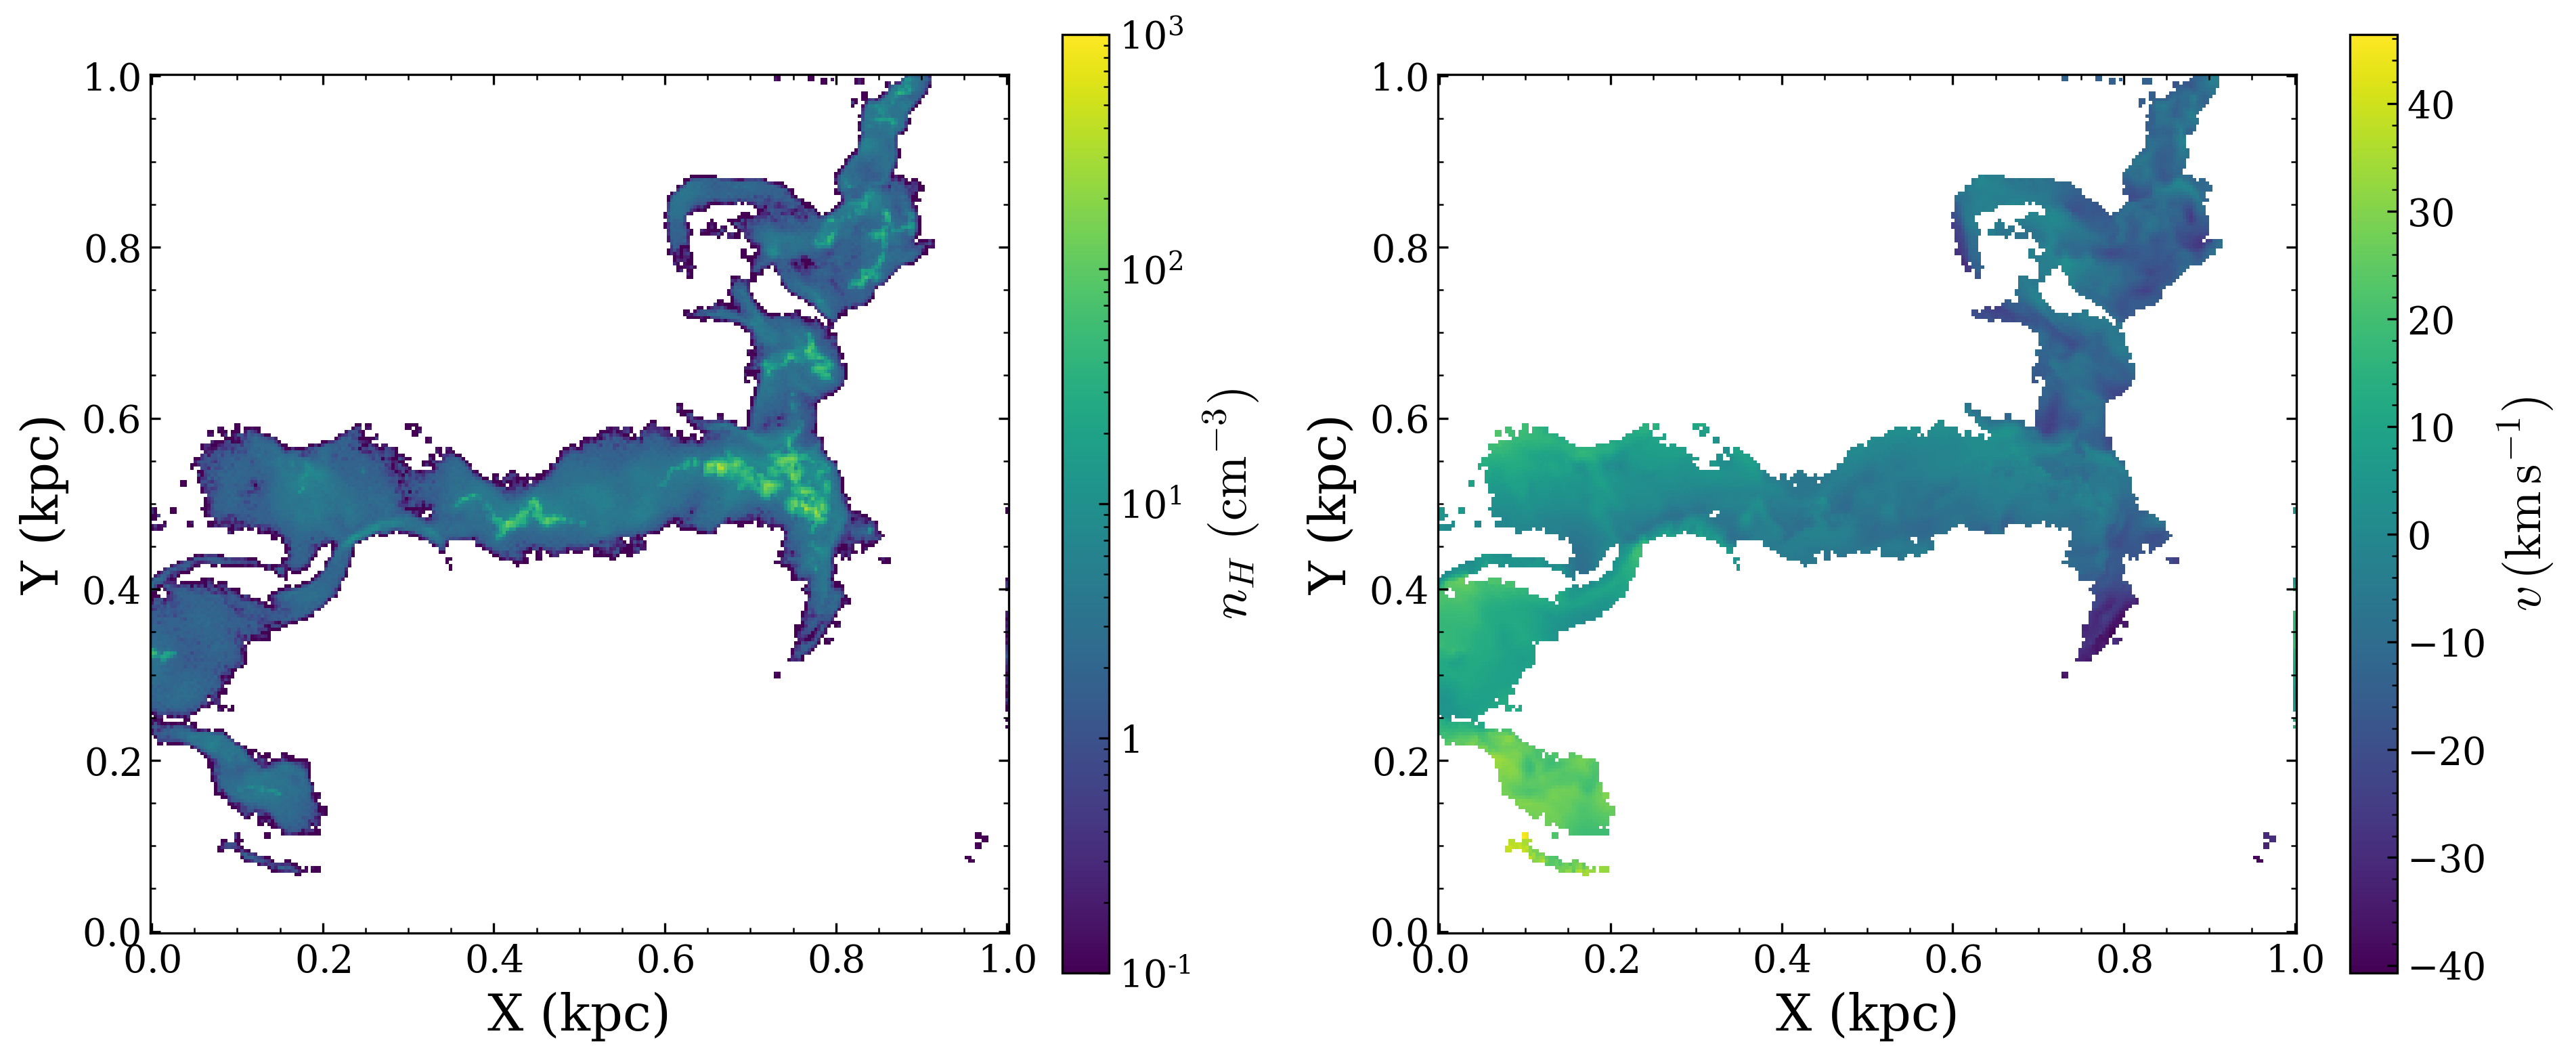

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
histField.plot_density_slice(index=128, axis=2, ax=ax[0])
histField.plot_velocity_slice(component=0, index=128, axis=2, ax=ax[1])
plt.show()